# 작업 노트

- 2/18
    - 한글화를 위한 크롤링
- 2/20
    - 챌린저 - 그랜드마스터 데이터 비교 시각화
    - 한글화 적용
        - 롤체GG에 없는 항목과 라이엇 내부 용어와 다른 항목들은 한글화 하지 못함.

In [4]:
# 데이터 시각화 커스텀 모듈
import print_package as pp

import pandas as pd

import re

from collections import Counter, defaultdict

import warnings
warnings.filterwarnings('ignore')

In [6]:
from ast import literal_eval

# String -> List
def string_to_dict(s):
    return literal_eval(s)

In [9]:
# List만들기 위한 String 전처리
def clean_String_Units(s):
    s = re.sub("^\[|\]$" ,'', s)
    s = re.sub(", (?=[\{])",'',s)
    return [x for x in re.split('({[^}]+})', s) if x]

#### 텍스트

In [10]:
# TFT Text Cleaning
def clean_TFT_string(s):
    if ('augment' in s) or ('Augment' in s):
        return re.search('(?<=[a,A]ugment_)[A-Za-z0-9]*', s).group(0)

    elif 'Item' in s:
        return re.sub('TFT[0-9]*_Item_', '', s)
    
    return re.sub('TFT[0-9]*_' , '', s)

In [11]:
# 증강 한글화
def getAugKor(s):
    isChamp = re.search('[A-Za-z]*((?=Support)|(?=Carry))', s)
    
    if isChamp:
        champ = (isChamp.group(0))
        champ = str.lower(champ.replace('AS', ''))
        
        if 'Carry' in s:
            return getEngToKor(champ, champ_dict) + ' - ' + list(champ_augments_dict[champ][0].values())[0]
        else:
            return getEngToKor(champ, champ_dict) + ' - ' + list(champ_augments_dict[champ][1].values())[0]
        
    else:
        try:
            s = str.lower(s)
            if 'tomeoftraits' in s:
                s = s.replace('tomeoftraits', 'ancientarchives')

            elif 'targetdummies' in s:
                s = s.replace('targetdummies', 'phonyfrontline')

            elif 'plus' in s:
                s = s.replace('plus', '+')

            return augments_dict[s]
        except:
            return s


#### 시너지, 챔피언 이름 한글화

In [13]:
synergy['champ'] = synergy['champ'].apply(string_to_dict)
synergy['effects'] = synergy['effects'].apply(string_to_dict)

synergy_en['champ'] = synergy_en['champ'].apply(string_to_dict)

champ_cost_df['champ'] = champ_cost_df['champ'].str.lower()

In [14]:
# 사전 반전
def swap_dict(dicts):
    return {v:k for k,v in dicts.items()}

# 영어->한글
def getEngToKor(s, dicts = ko_en_dict):
    try:
        s = str.lower(s)
        return dicts[s]
    except:
        return s

# 한글 -> 영어
def getKorToEng(s, dicts = ko_en_dict):
    try:
        dicts = swap_dict(dicts)
        return dicts[s]
    except:
        return s

## 시각화

### 티어벌 게임수(승리/패배)

In [16]:
# TFT 소환사 기본정보 데이터 불러오기
summoners_df = pd.read_csv('./data/summoners_info.csv', index_col=0)

In [175]:
summoner_games = summoners_df.groupby('tier')['wins','losses'].sum()
summoner_games['games'] = summoner_games['wins'] + summoner_games['losses']
summoner_games = summoner_games.reset_index()

In [176]:
custom_dict = {'IRON' :0, 'BRONZE' : 1, 'SILVER' : 2, 'GOLD' : 3, 'PLATINUM' : 4, 'DIAMOND' : 5,
               'MASTER' : 6, 'GRANDMASTER' : 7, 'CHALLENGER' :8 
} 


summoner_games = summoner_games.sort_values(by=['tier'], key=lambda x: x.map(custom_dict))

In [178]:
pp.printTierBasicInfo(summoner_games)

### 챌린저 티어에서 주로 사용되는 유닛은?

- 데이터
     - 챌린저 유저 300명의 최근 50경기 중 중복되지 않는 경기들에 대한 플레이어 기록을 가져옵니다
     - 그랜드마스터 유저 600명의 최근 20경기 중 중복되지 않는 경기들에 대한 플레이어 기록을  가져옵니다.
- Top10 챔피언 티어별 시각화

#### 최근 게임 게임 기록 가져오기

In [21]:
# 챌린저 최근 50게임 정보 가져오기
chall_games = pd.read_csv('./data/CHALLENGER_games_data.csv', index_col=0)
gm_games = pd.read_csv('./data/GRANDMASTER_games_data.csv', index_col=0)
m_games = pd.read_csv('./data/MASTER_games_data.csv', index_col=0)
d_games = pd.read_csv('./data/DIAMOND_games_data.csv', index_col=0)
p_games = pd.read_csv('./data/PLATINUM_games_data.csv', index_col=0)
g_games = pd.read_csv('./data/GOLD_games_data.csv', index_col=0)
s_games = pd.read_csv('./data/SILVER_games_data.csv', index_col=0)
b_games = pd.read_csv('./data/BRONZE_games_data.csv', index_col=0)
i_games = pd.read_csv('./data/IRON_games_data.csv', index_col=0)


In [24]:
chall_games['units'] = chall_games['units'].apply(clean_String_Units)
gm_games['units'] = gm_games['units'].apply(clean_String_Units)
m_games['units'] = m_games['units'].apply(clean_String_Units)
d_games['units'] = d_games['units'].apply(clean_String_Units)
p_games['units'] = p_games['units'].apply(clean_String_Units)
g_games['units'] = g_games['units'].apply(clean_String_Units)
s_games['units'] = s_games['units'].apply(clean_String_Units)
b_games['units'] = b_games['units'].apply(clean_String_Units)
i_games['units'] = i_games['units'].apply(clean_String_Units)

In [29]:
tiers = ['CHALLENGER', "GRANDMASTER", 'MASTER', 'DIAMOND', 'PLATINUM', 'GOLD', 'SLIVER', 'BRONZE', "IRON"]

In [30]:
tier_games = [chall_games, gm_games, m_games, d_games, p_games, g_games, s_games, b_games, i_games]

tier_units = dict()
tier_items = dict()

for idx, games in enumerate(tier_games):

    unit_cnt = []
    item_cnt = defaultdict(list)
    
    for units in tqdm(games['units']):
        for unit in units:
            target = string_to_dict(unit)
            
            unit_cnt.append(target['character_id'])
            item_cnt[target['character_id']] = item_cnt[target['character_id']] + target['itemNames']
            
    
    tier_units[tiers[idx]] = unit_cnt
    tier_items[tiers[idx]] = item_cnt

100%|████████████████████████████████████| 92664/92664 [07:00<00:00, 220.25it/s]


In [179]:
with open('./data/tier_units.pkl', 'wb') as f:
    pickle.dump(tier_units, f)
    
with open('./data/tier_items.pkl', 'wb') as f:
    pickle.dump(tier_items, f)
    

In [181]:
with open('./data/tier_units.pkl', 'rb') as f:
    tier_units = pickle.load(f)
    
with open('./data/tier_items.pkl', 'rb') as f:
    tier_items = pickle.load(f)

#### Top10 챔피언은??

In [37]:
# 챌린저 게임 유닛 dataframe

units_frequency = pd.DataFrame()

for tier in tiers:
    tmp = Counter(tier_units[tier])
    
    cnt_df = pd.DataFrame({
        'champ' : tmp.keys(),
        'cnt' : tmp.values(),
        'tier' : tier
    })
    
    units_frequency = pd.concat([units_frequency, cnt_df])
    

In [99]:
units_frequency.to_csv('./data/unit_frequency.csv')

In [112]:
units_frequency = pd.read_csv('./data/unit_frequency.csv')

In [72]:
units_frequency = units_frequency.drop(units_frequency[units_frequency['champ'].str.contains('TFT7')].index)

In [74]:
units_frequency['champ'] = units_frequency['champ'].apply(clean_TFT_string)

In [238]:
import importlib
importlib.reload(print_package)

<module 'print_package' from '/Users/seokholee/KDT/lsh_package/TFT/print_package.py'>

In [239]:
pp.printUnitFreq(units_frequency, select_tier=['CHALLENGER', 'MASTER'])

CHALLENGER Top Champions!!
1 COST : 오공
2 COST : 바이
3 COST : 알리스타
4 COST : 에코
5 COST : 피들스틱

MASTER Top Champions!!
1 COST : 오공
2 COST : 바이
3 COST : 알리스타
4 COST : 에코
5 COST : 피들스틱



#### 아이템은???

In [189]:
# 챌린저, 그랜드마스터 사용 아이템 dataframe
chall_items_frequency_df = pd.DataFrame()
gm_items_frequency_df = pd.DataFrame()

for key, value in chall_items.items():
    tmp = Counter(chall_items[key])
    
    tmp2 = pd.DataFrame({
        'char' : key,
        'item' : tmp.keys(),
        'cnt' : tmp.values()
    })
    chall_items_frequency_df = pd.concat([chall_items_frequency_df, tmp2])
    
for key, value in gm_items.items():
    tmp = Counter(gm_items[key])
    
    tmp2 = pd.DataFrame({
        'char' : key,
        'item' : tmp.keys(),
        'cnt' : tmp.values()
    })
    gm_items_frequency_df = pd.concat([gm_items_frequency_df, tmp2])

In [190]:
# 아이템 df 통합
chall_items_frequency_df['tier'] = 'CHALLENGER'
gm_items_frequency_df['tier'] = 'GRANDMASTER'

items_frequency_df = pd.concat([chall_items_frequency_df, gm_items_frequency_df])

In [191]:
# TFT 텍스트 클리닝
items_frequency_df['char'] = items_frequency_df['char'].apply(clean_TFT_string)
items_frequency_df['item'] = items_frequency_df['item'].apply(clean_TFT_string)

In [192]:
items_frequency_df = items_frequency_df.sort_values('cnt', ascending=False).reset_index()

In [226]:
def printItemFreq(champ, num=5):

    target = items_frequency_df[['char','item','tier','cnt']]
    target['char'] = target['char'].str.lower()
                            
    target = target[target['char'] == champ]
    
    chall = target[target['tier'] == 'CHALLENGER']
    gm = target[target['tier'] == 'GRANDMASTER']
    
    chall_x = [getEngToKor(x, items_dict) for x in chall['item'][:num]]
    gm_x = [getEngToKor(x, items_dict) for x in gm['item'][:num]]
    
    fig = go.Figure(data=[
            go.Bar(name = '챌런지', x = chall_x, y = chall['cnt'], text = chall['cnt'],  textposition='auto', texttemplate = "%{text:,}"),
            go.Bar(name = '그랜드마스터', x = gm_x, y = gm['cnt'], text = gm['cnt'], textposition='auto', texttemplate = "%{text:,}")
    ])
    fig.update_layout(barmode='group',
                     title =  f"{champ_dict[champ]} 챔피언 챌린저 / 그랜드마스터 티어 주사용 아이템")

    fig.show()  # plotly UI사용
#     fig.show('svg')

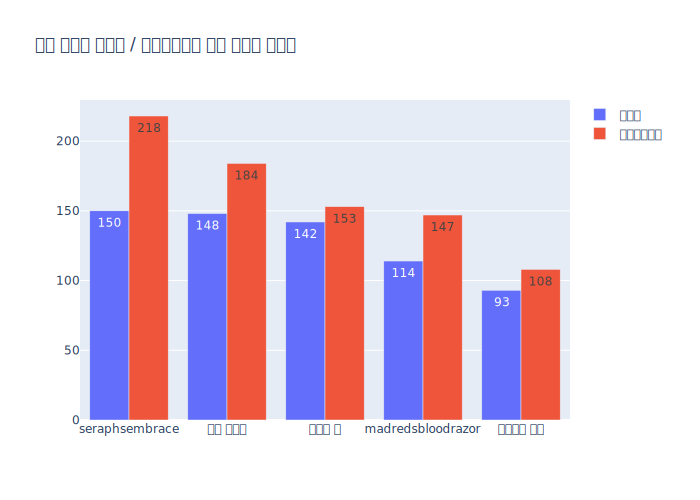

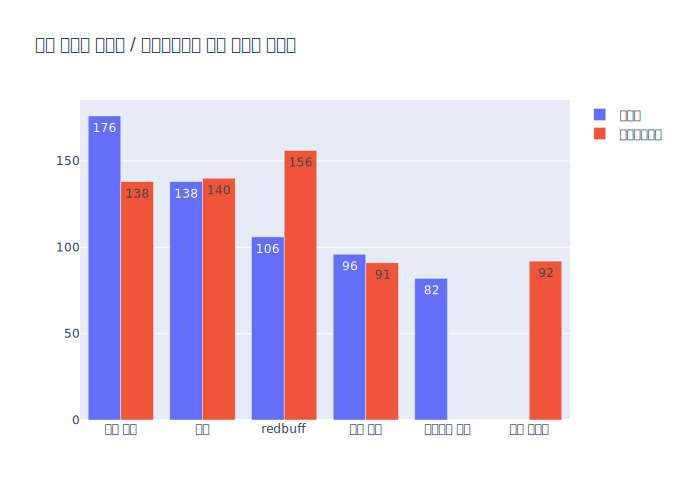

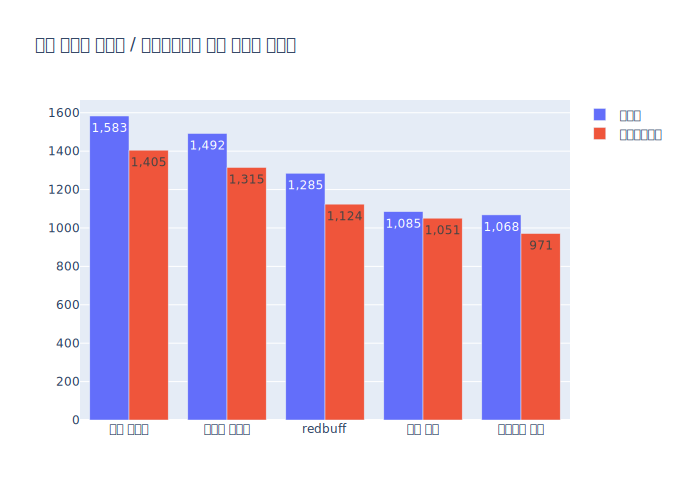

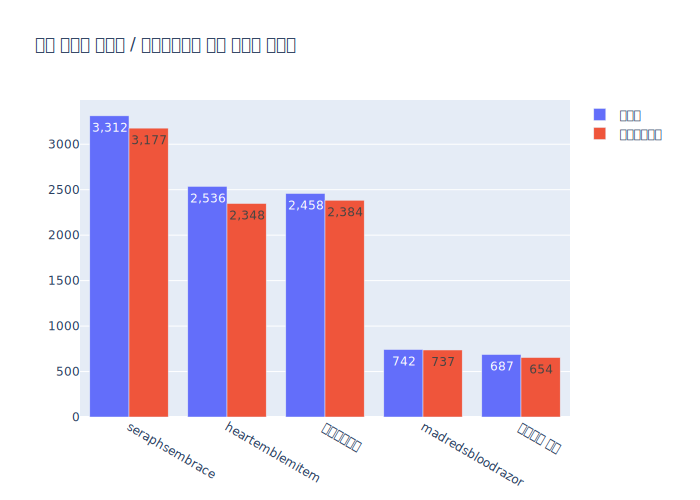

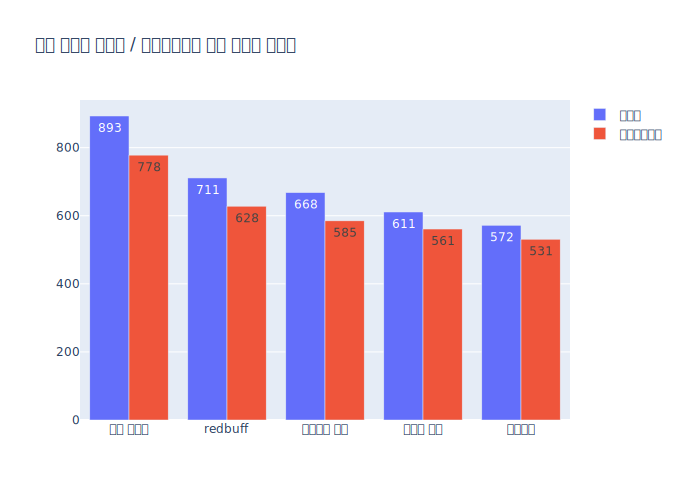

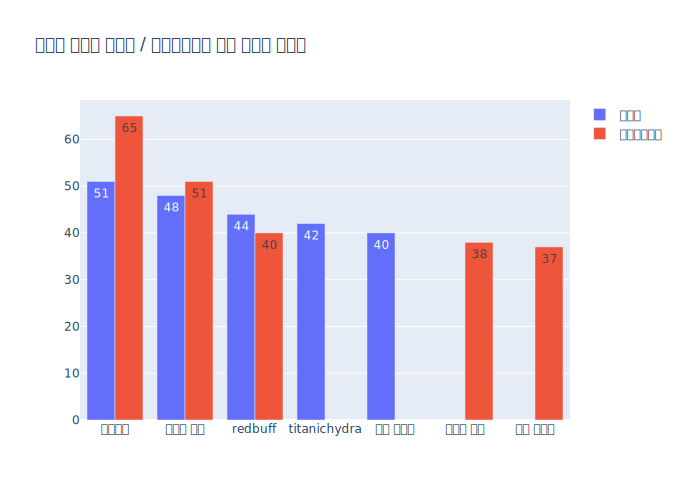

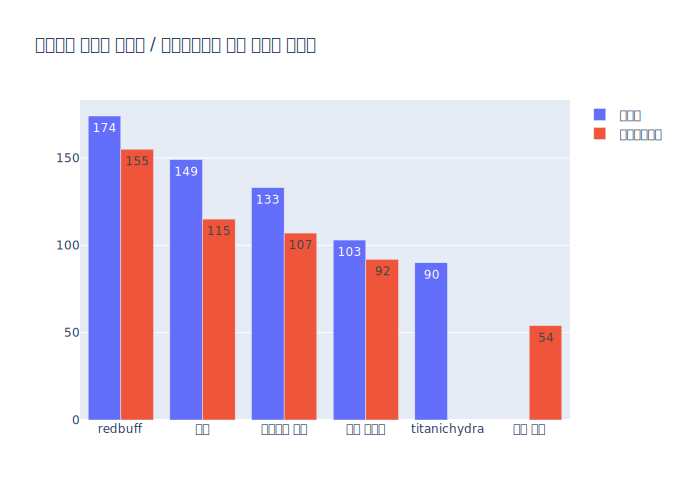

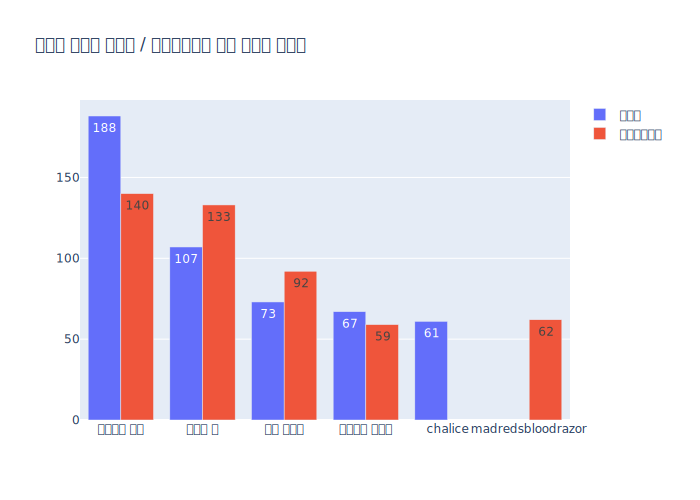

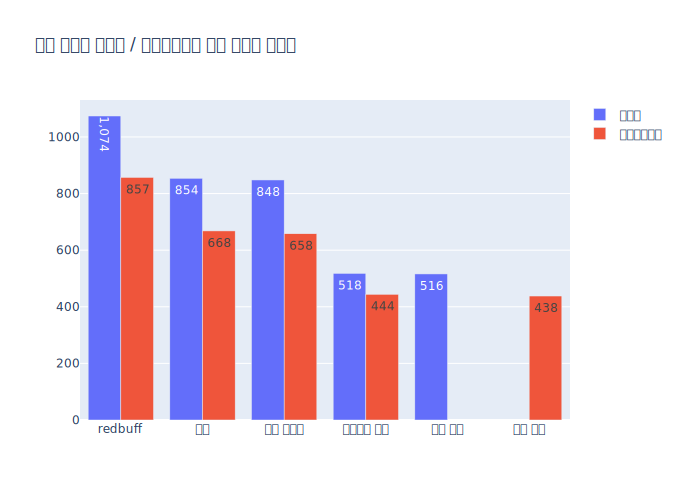

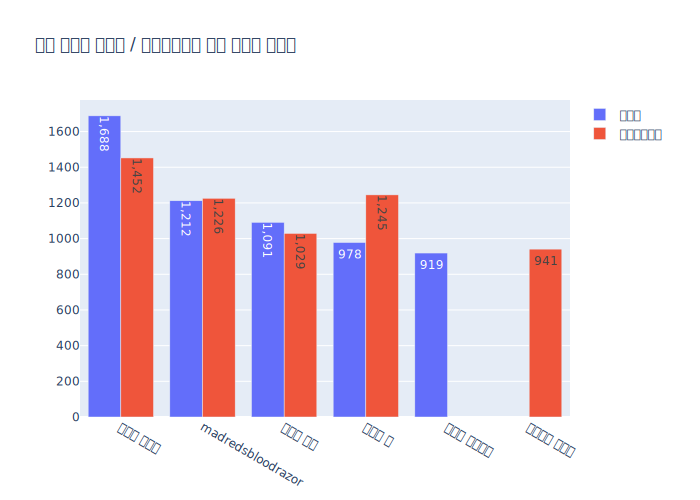

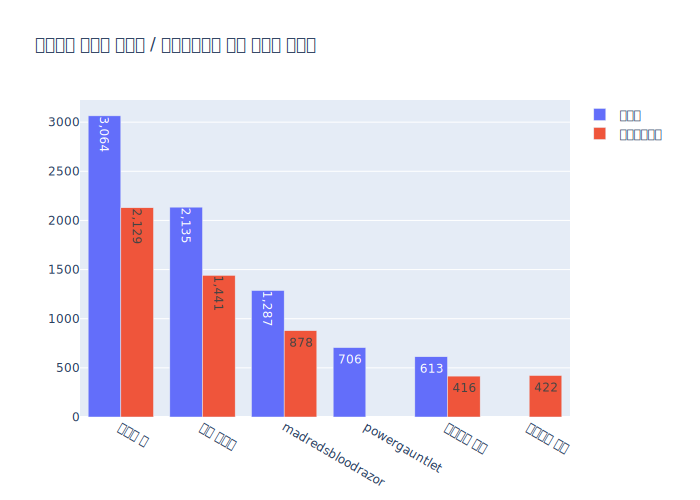

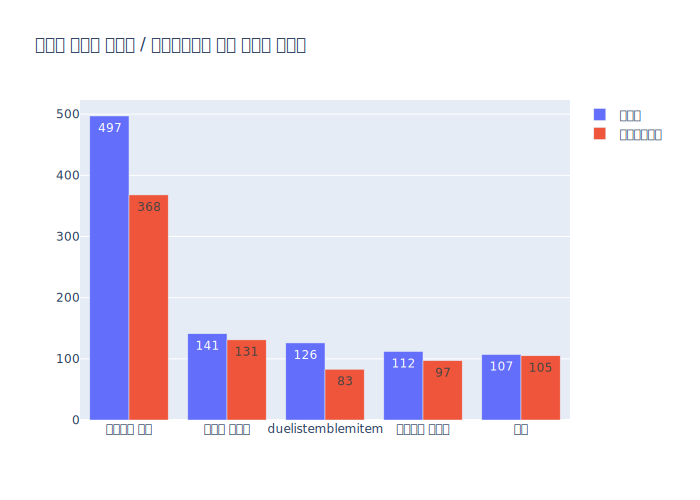

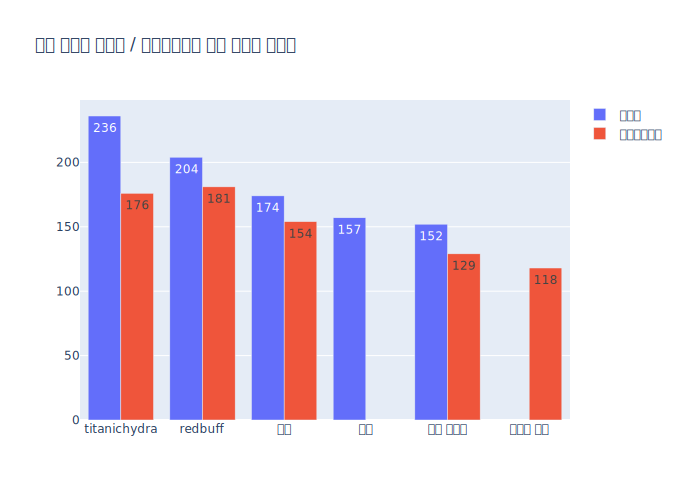

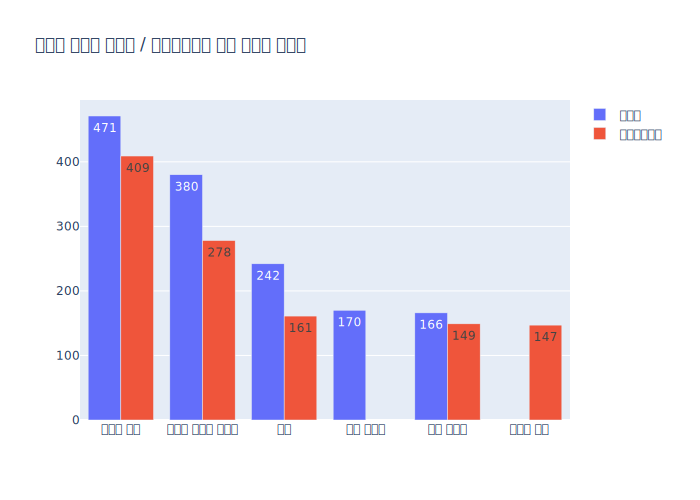

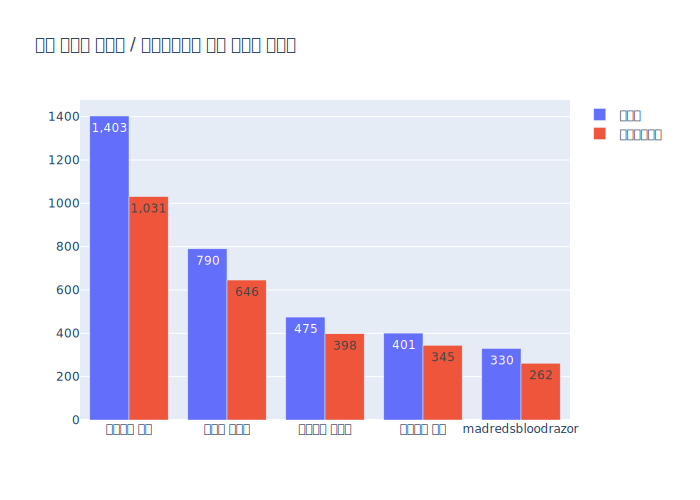

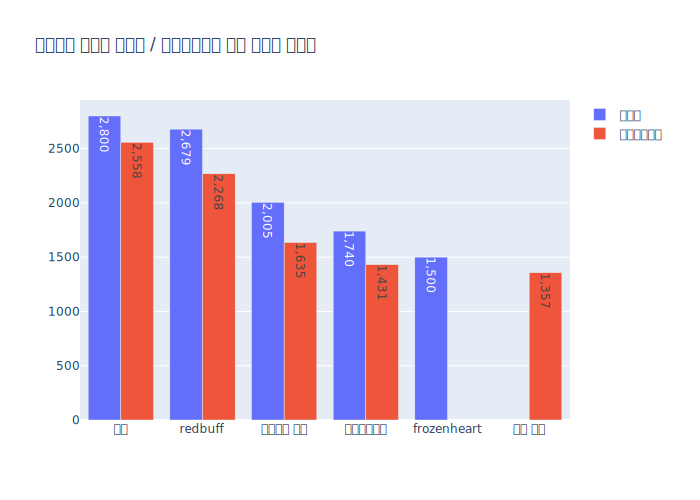

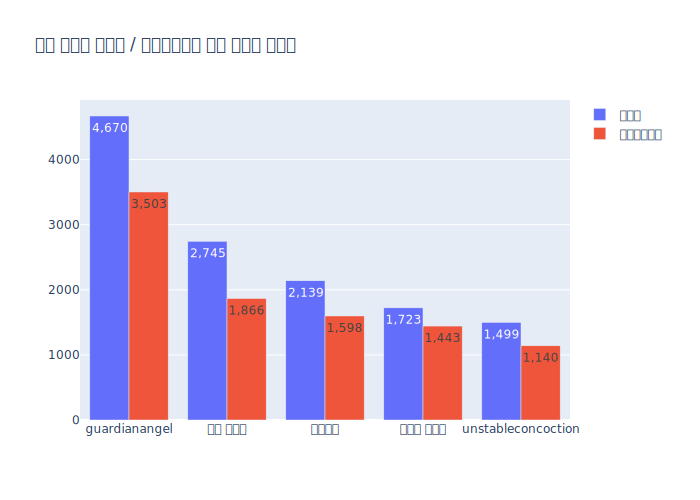

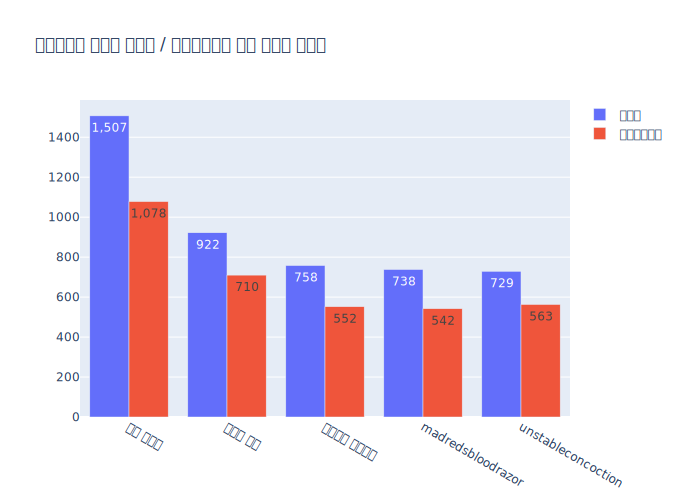

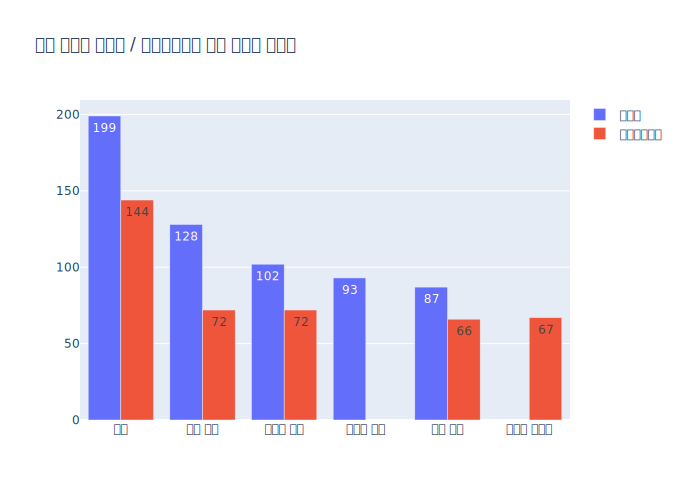

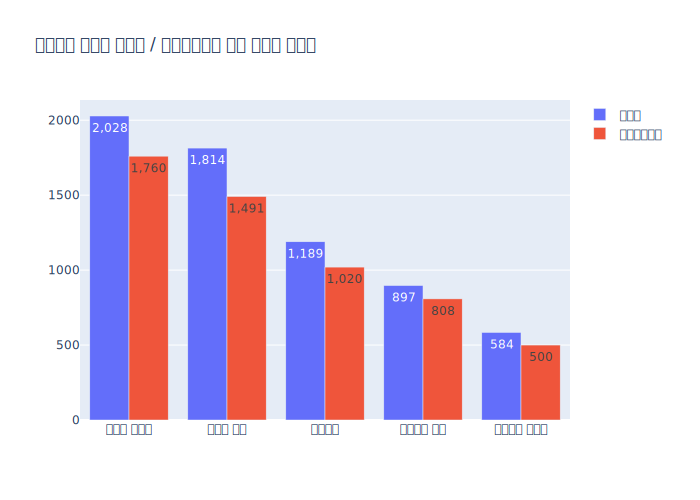

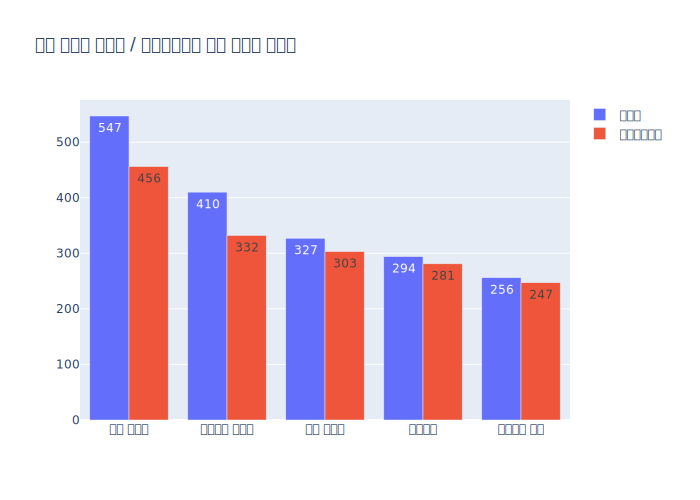

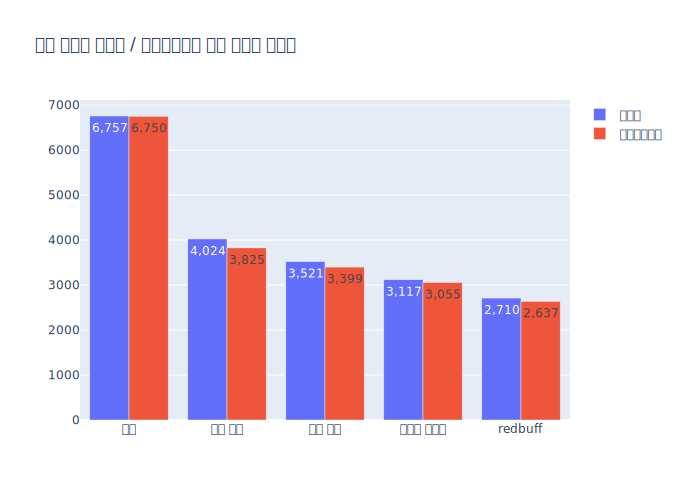

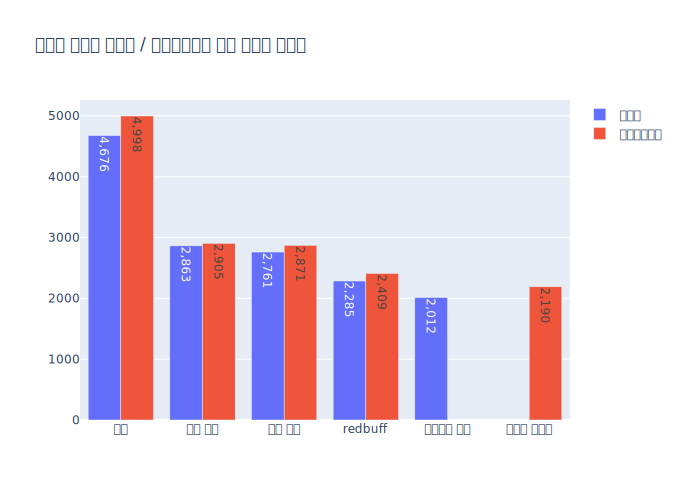

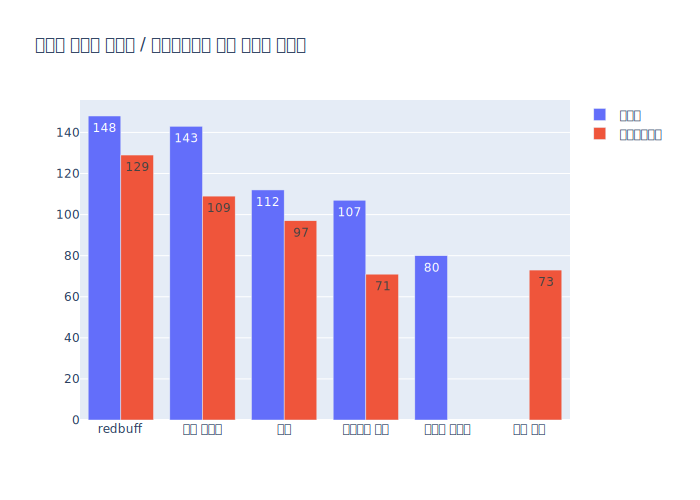

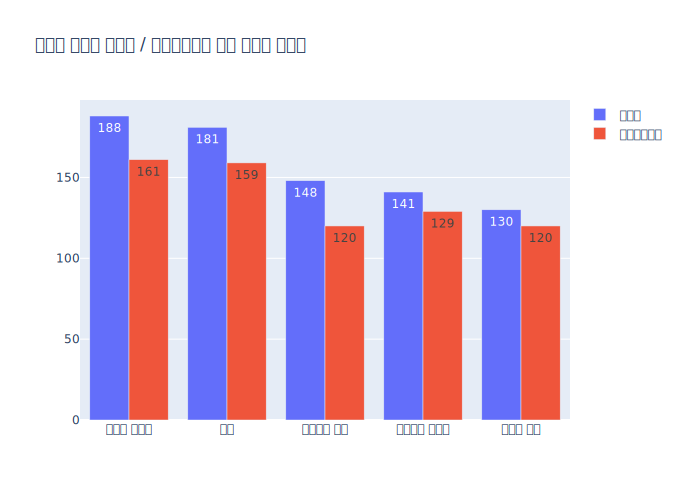

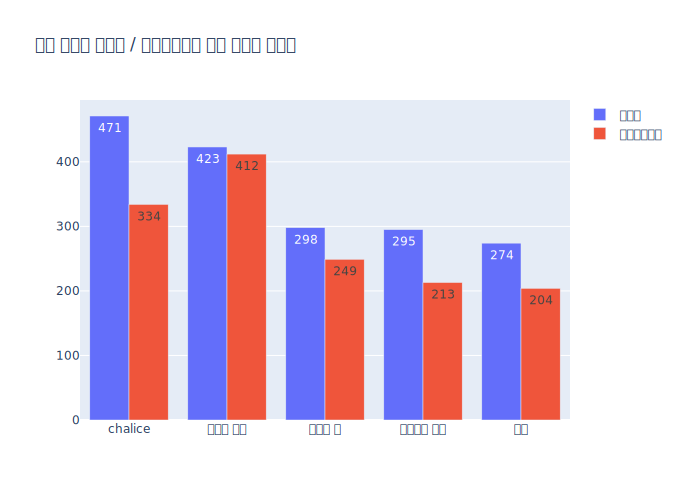

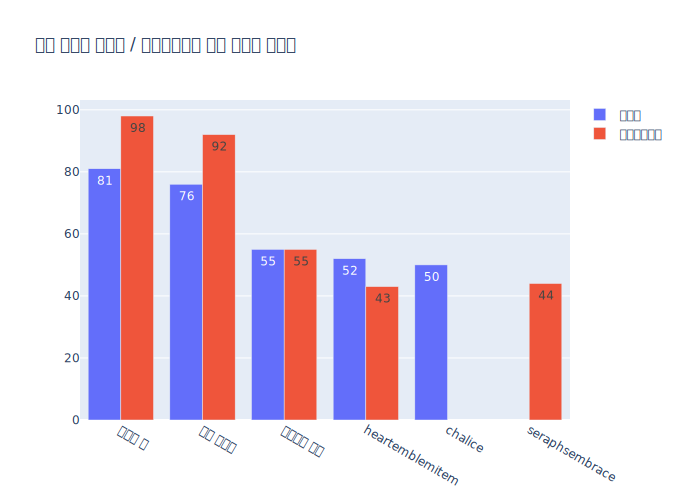

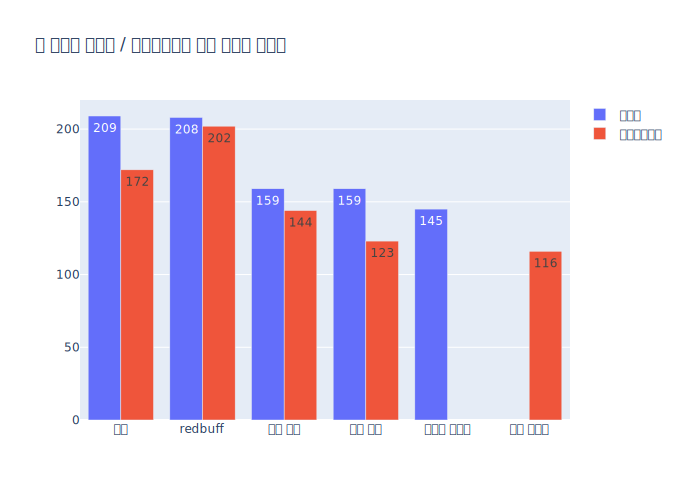

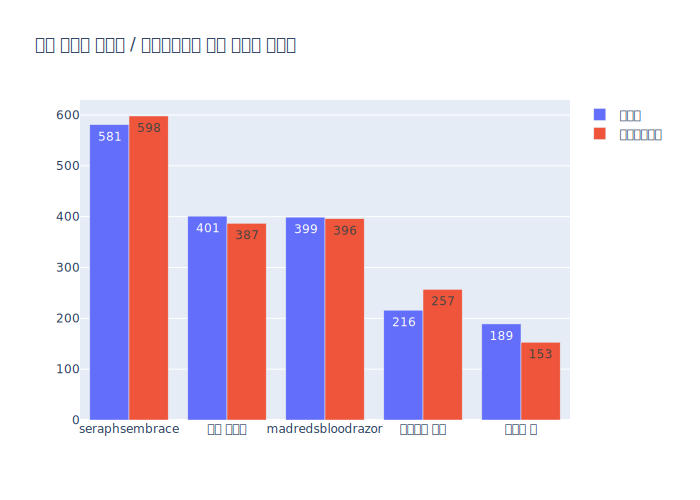

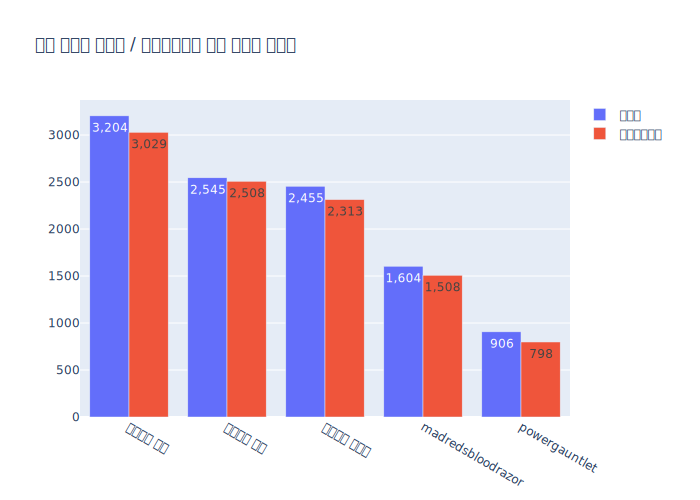

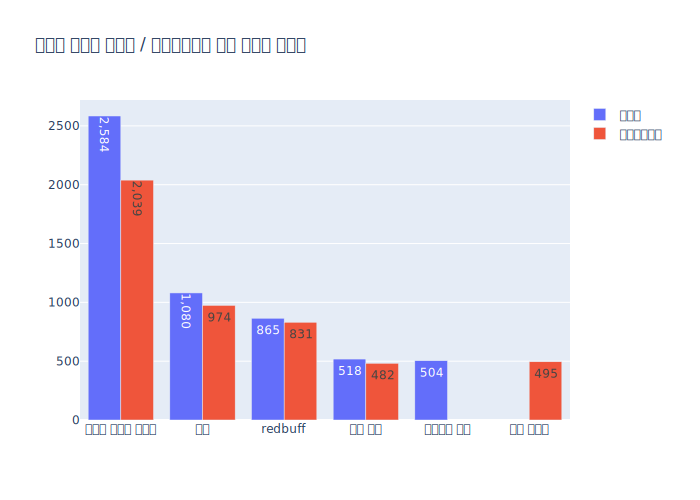

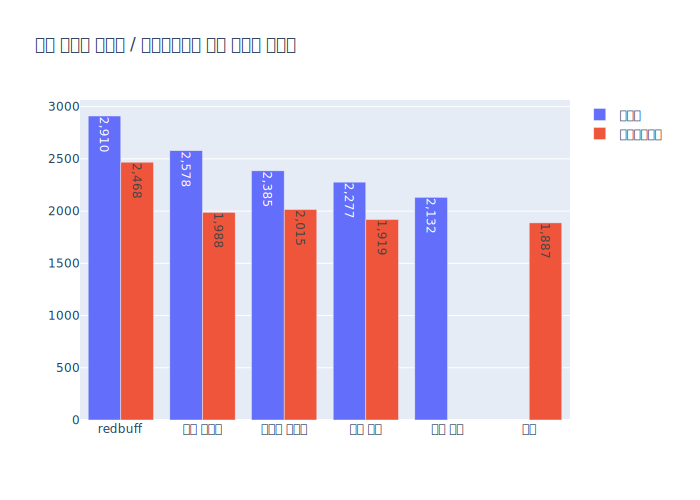

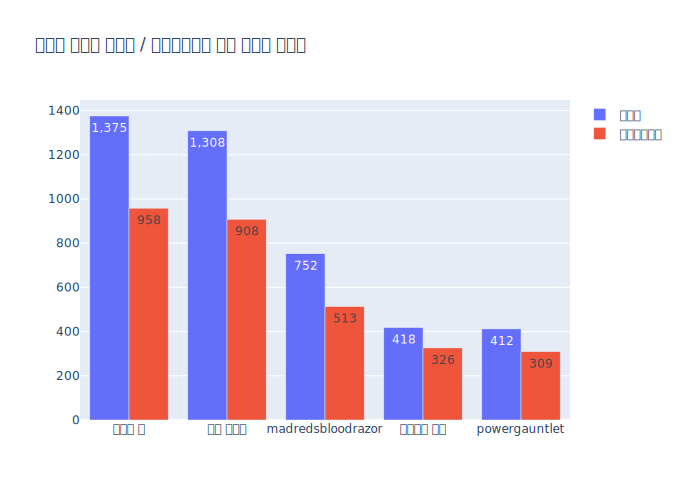

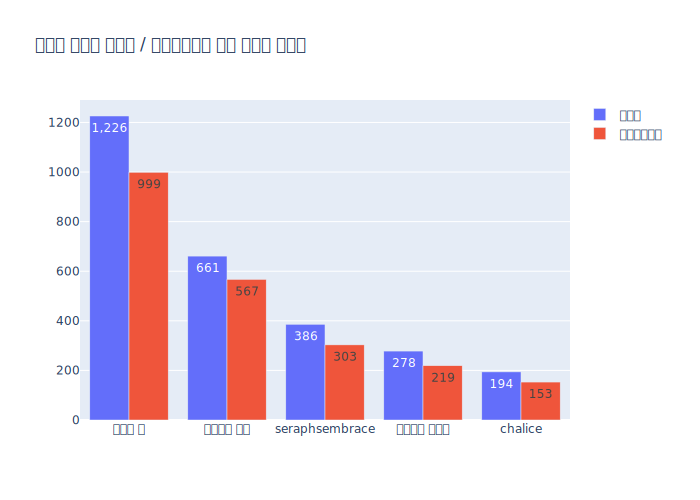

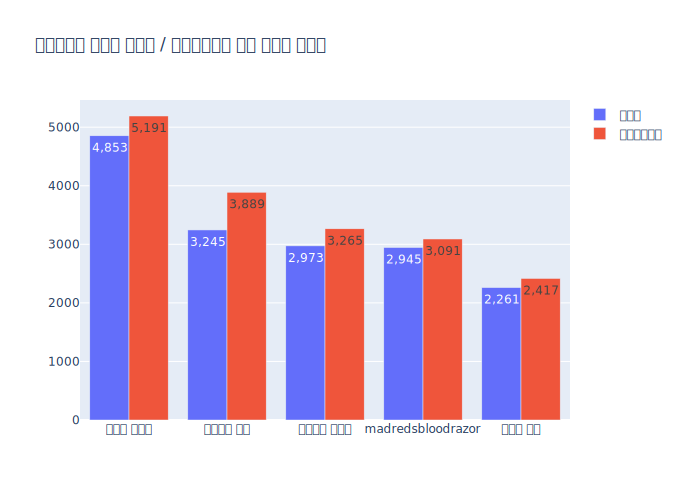

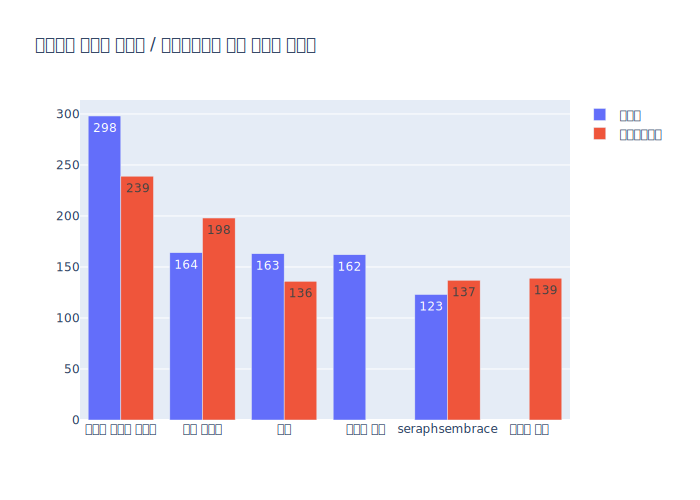

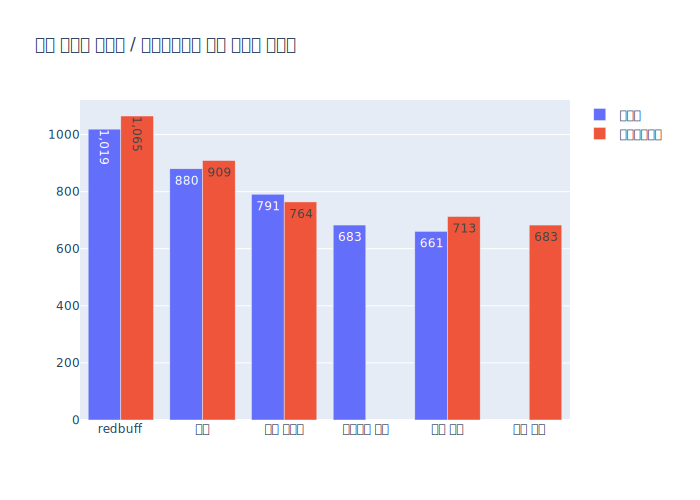

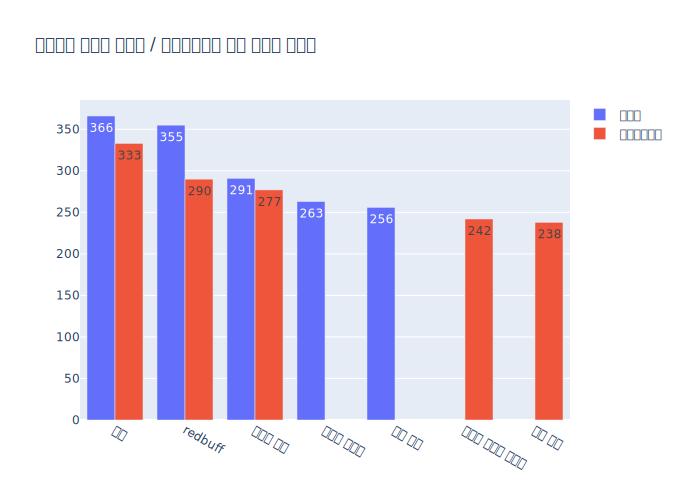

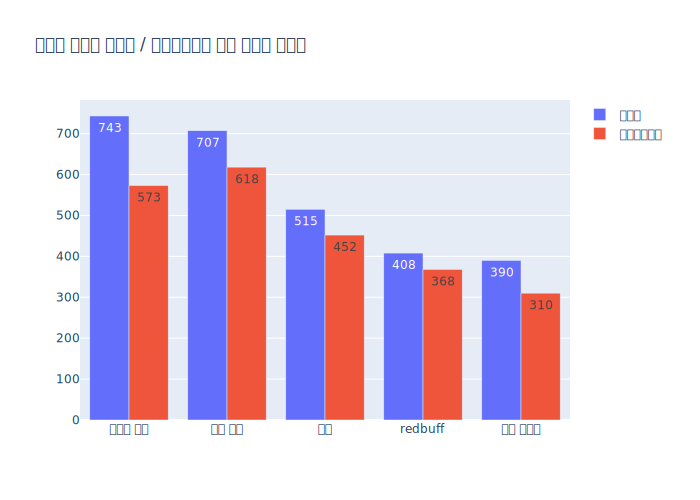

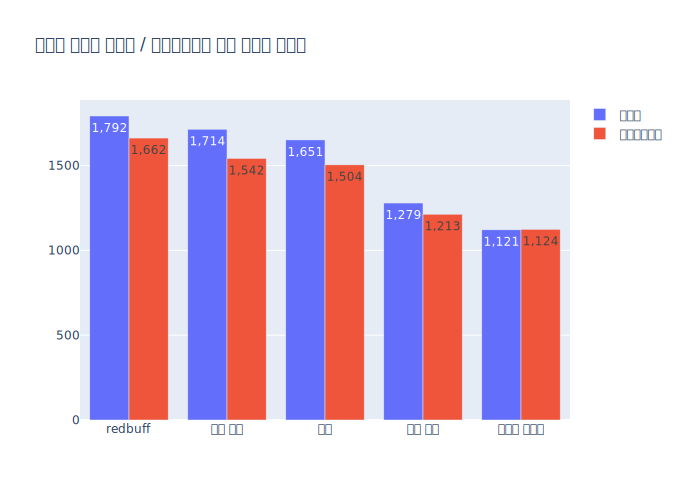

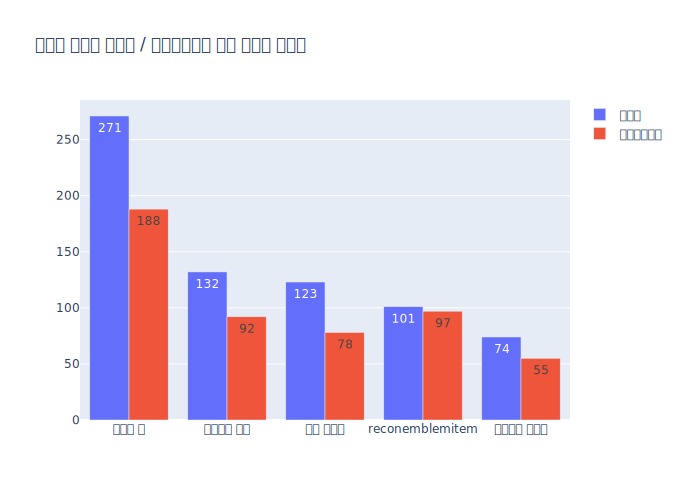

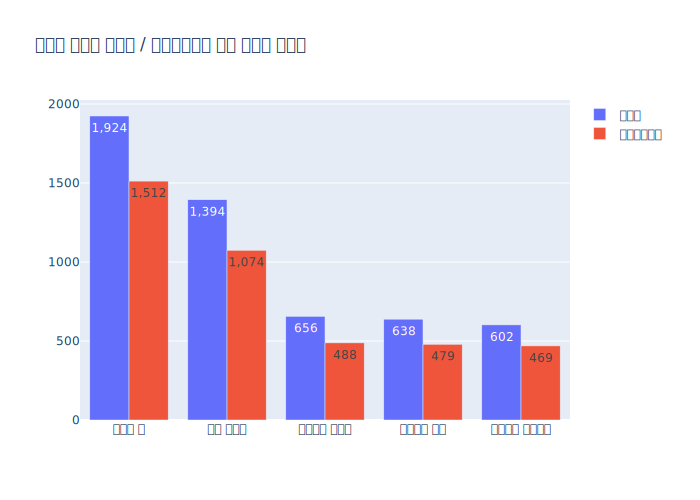

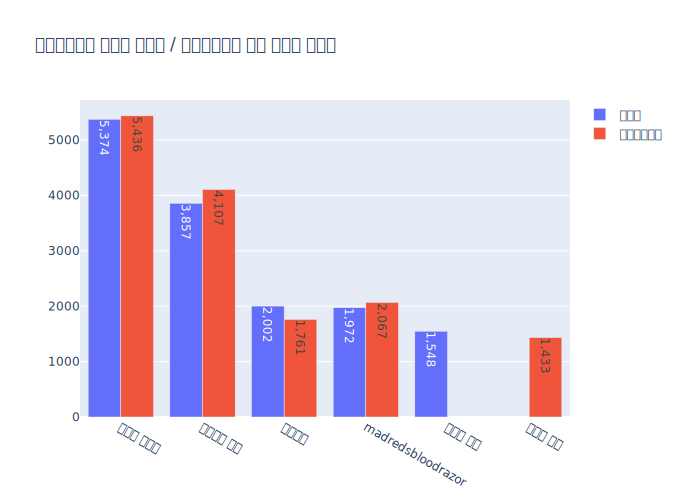

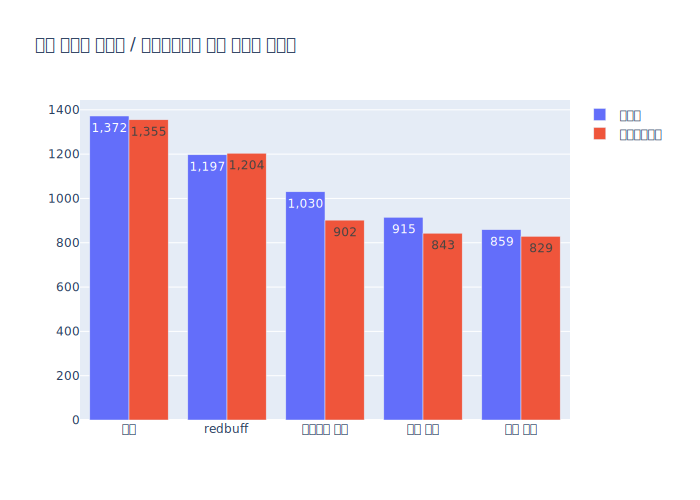

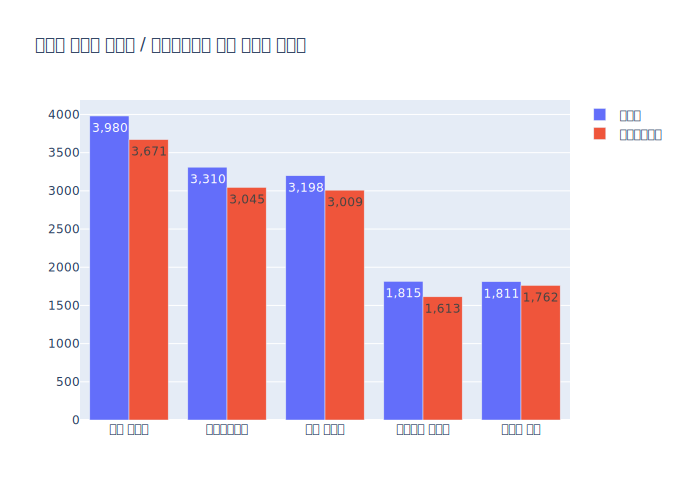

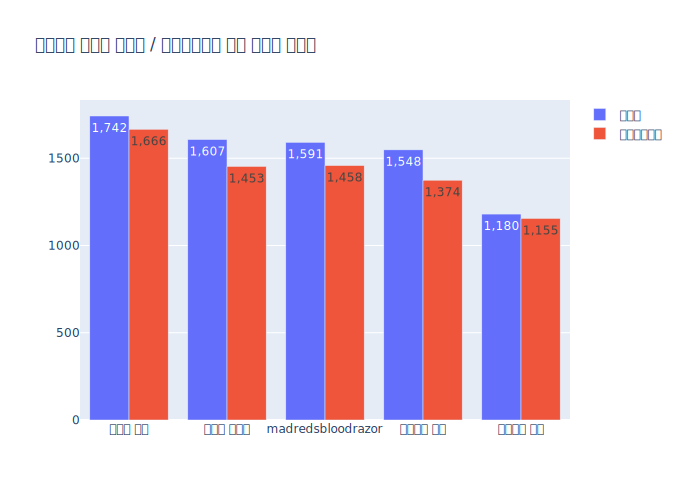

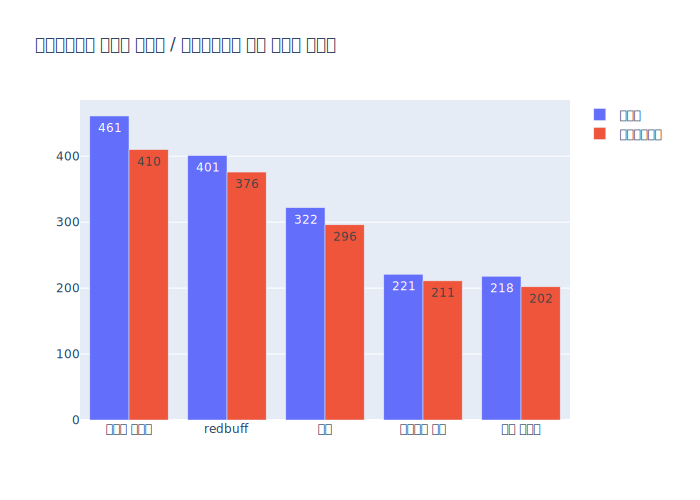

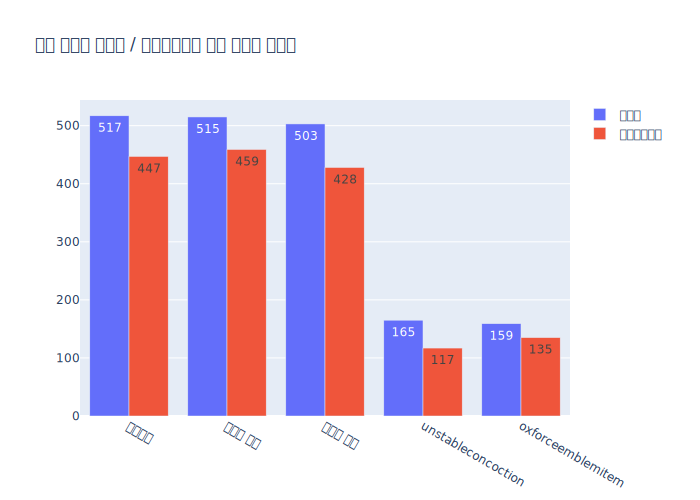

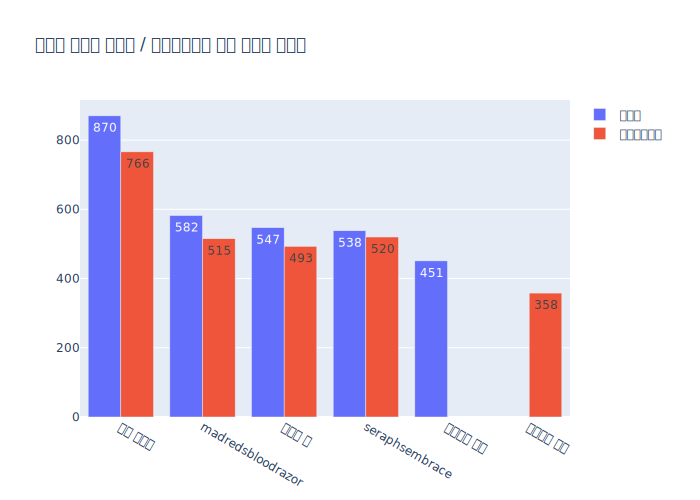

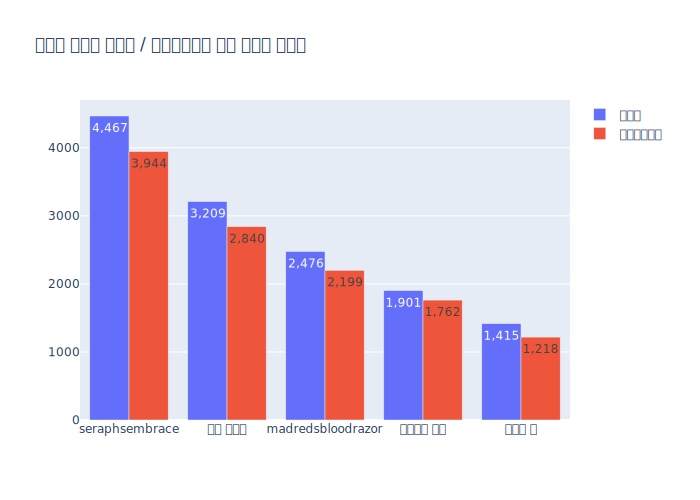

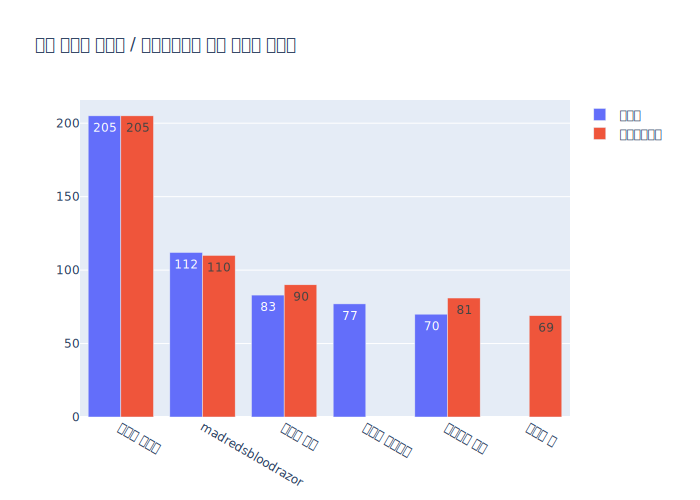

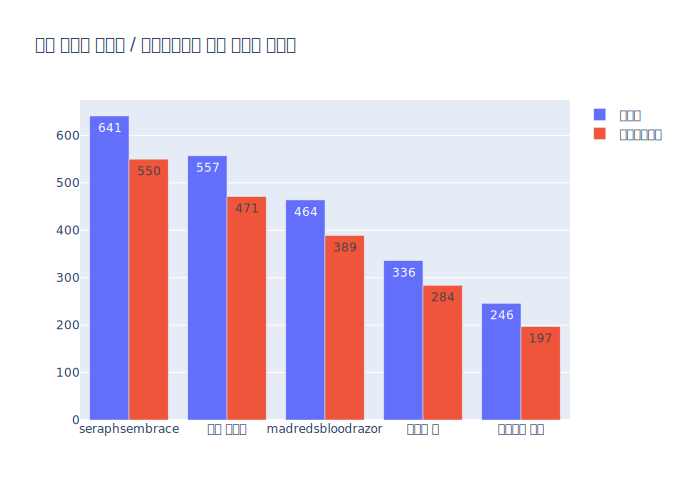

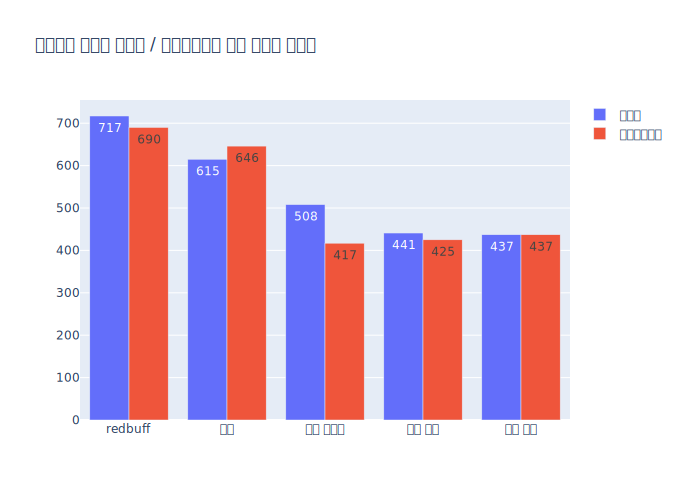

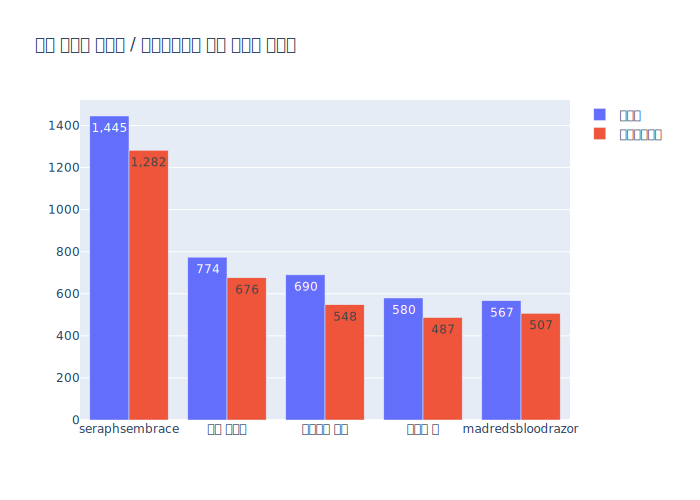

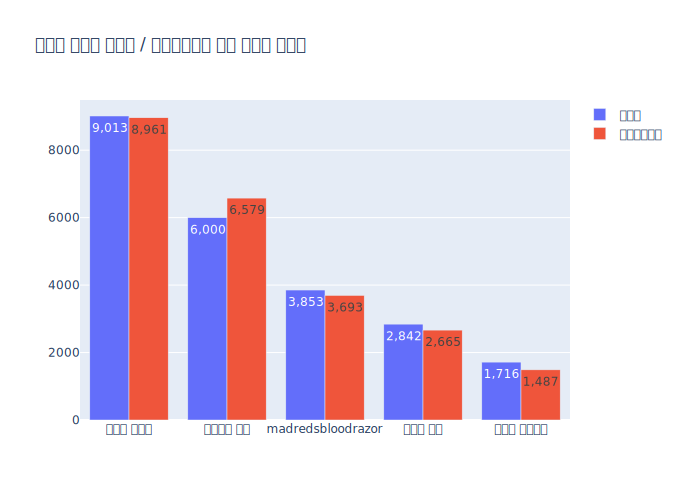

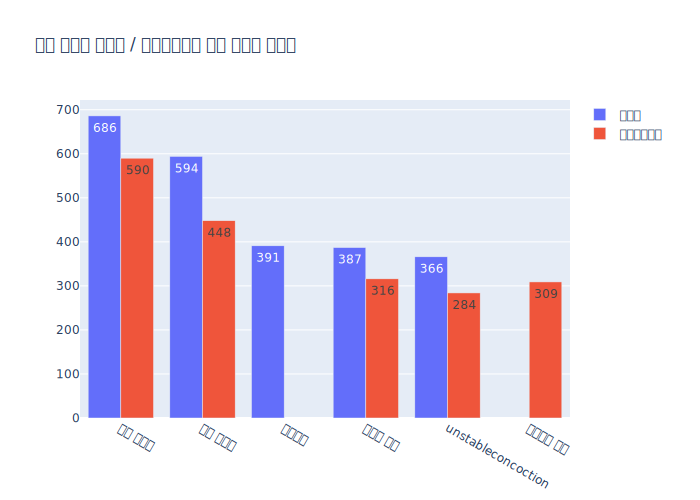

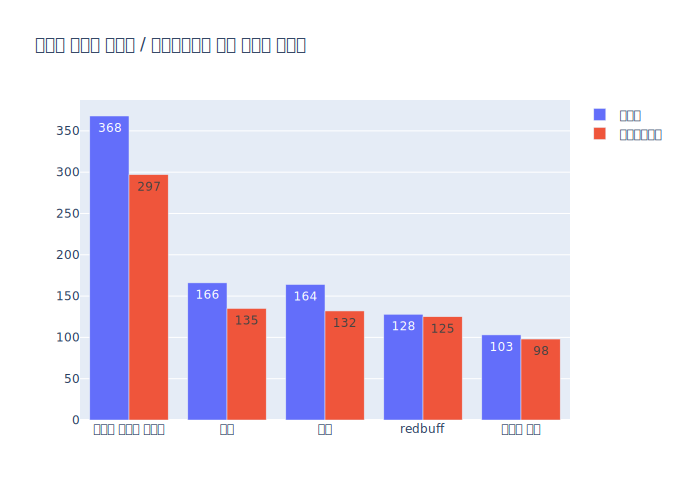

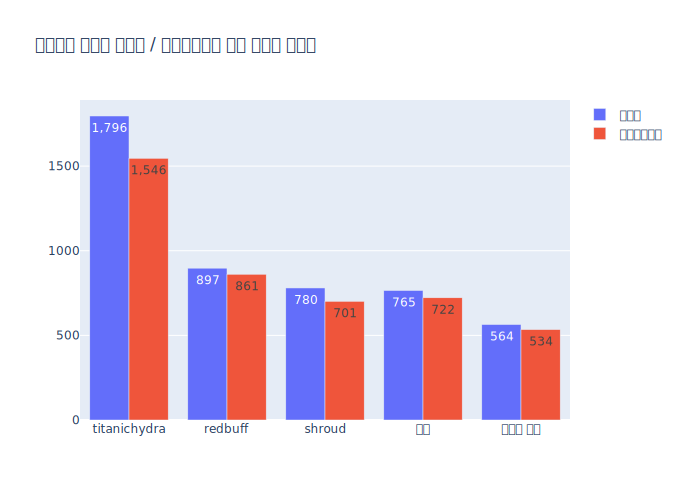

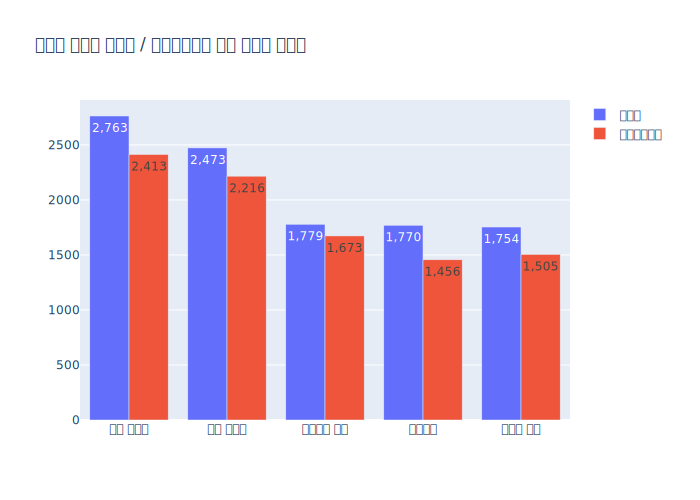

In [219]:
# 모든 챔피언 주사용 아이템 Top5
for champ in champ_dict.keys():
    printItemFreq(champ)

### 증강은??

In [38]:
chall_play_record['augments'] = chall_play_record['augments'].apply(string_to_dict)
gm_play_record['augments'] = gm_play_record['augments'].apply(string_to_dict)

In [39]:
chall_aug = []
gm_aug = []

for ca in chall_play_record['augments']:
    chall_aug += ca

for gma in gm_play_record['augments']:
    gm_aug += gma

In [40]:
tmp = Counter(chall_aug)

chall_aug_frequency_df = pd.DataFrame({
        'augments' : tmp.keys(),
        'cnt' : tmp.values()
    })

tmp = Counter(gm_aug)


gm_aug_frequency_df = pd.DataFrame({
        'augments' : tmp.keys(),
        'cnt' : tmp.values()
    })



chall_aug_frequency_df = chall_aug_frequency_df.sort_values('cnt', ascending=False)
gm_aug_frequency_df = gm_aug_frequency_df.sort_values('cnt', ascending=False)



In [41]:
# 증강 df 통합
chall_aug_frequency_df['tier'] = 'CHALLENGER'
gm_aug_frequency_df['tier'] = 'GRANDMASTER'

aug_frequency_df = pd.concat([chall_aug_frequency_df, gm_aug_frequency_df])

In [42]:
aug_frequency_df['augments'] = aug_frequency_df['augments'].apply(clean_TFT_string)
aug_frequency_df['augments'] = aug_frequency_df['augments'].apply(getAugKor)

In [227]:
def printAugFreq(num = 10):
    
    chall = aug_frequency_df[aug_frequency_df['tier'] == 'CHALLENGER']
    gm = aug_frequency_df[aug_frequency_df['tier'] == 'GRANDMASTER']
    
    target_cnt = set(list(chall['augments'][:num].values) + list(gm['augments'][:num].values))
    target = aug_frequency_df[aug_frequency_df['augments'].isin(list(target_cnt))]
    
    chall = target[target['tier'] == 'CHALLENGER']
    gm = target[target['tier'] == 'GRANDMASTER']
    
    fig = go.Figure(data=[
            go.Bar(name = '챌린저', x = chall['augments'], y = chall['cnt'], text = chall['cnt'],  textposition='auto', texttemplate = "%{text:,}"),
            go.Bar(name = '그랜드마스터', x = gm['augments'], y = gm['cnt'], text = gm['cnt'],  textposition='auto', texttemplate = "%{text:,}")
    ])
    fig.update_layout(barmode='group',
                     title =  "챌린저 / 그랜드마스터 주사용 증강")

    fig.show()  # plotly UI사용
#     fig.show('svg')

In [228]:
printAugFreq(15)